In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Plot general boxplots

In [2]:
df_all = pd.read_csv("../../data/50_models_all.csv")
df_IA = pd.read_csv("../../data/50_models_only_IA.csv")

In [3]:
sns.set_palette("pastel")

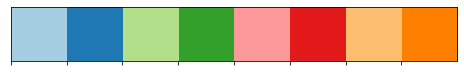

In [4]:
custom_palette = sns.color_palette("Paired", 8)
sns.palplot(custom_palette)

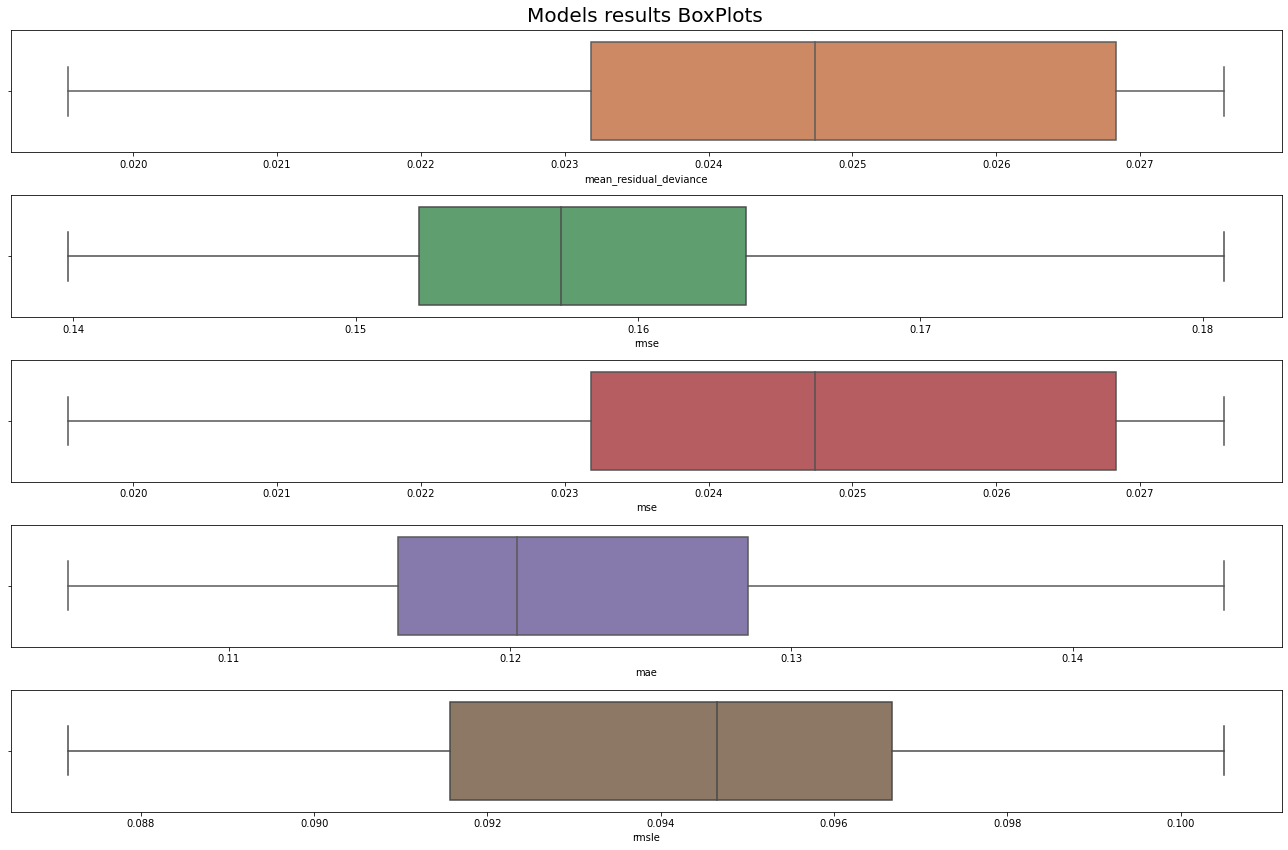

In [5]:
size = (18, 12)
title = "Models results BoxPlots"
fig, axs = plt.subplots(nrows=len(df_all.columns)-1, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(df_all.columns):
    if i == 0:
        continue
    sns.boxplot(
        x=df_all[col],
        showfliers = False,
        color=custom_palette[i],
        ax=axs[i-1]
    )
    fig.tight_layout()

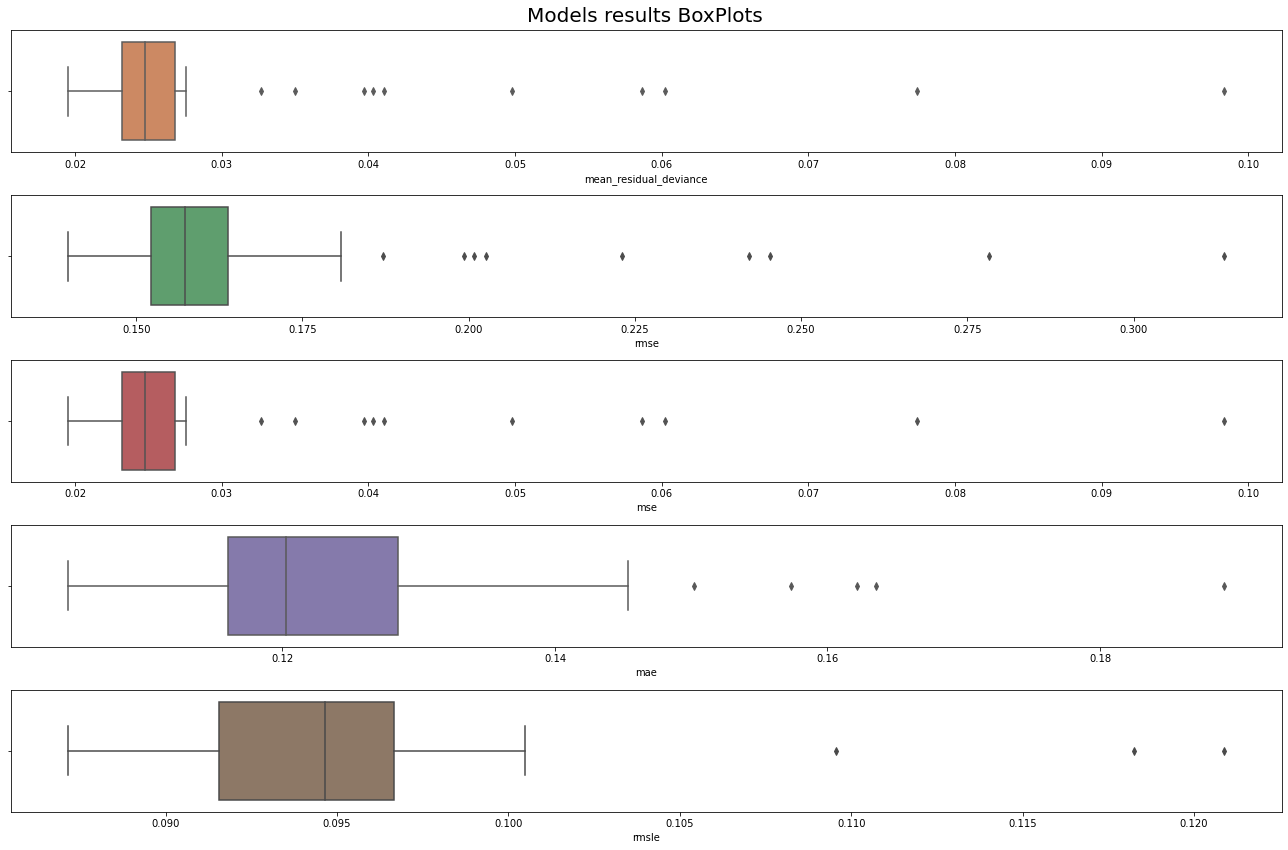

In [6]:
size = (18, 12)
title = "Models results BoxPlots"
fig, axs = plt.subplots(nrows=len(df_all.columns)-1, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(df_all.columns):
    if i == 0:
        continue
    sns.boxplot(
        x=df_all[col],
        showfliers = True,
        color=custom_palette[i],
        ax=axs[i-1]
    )
    fig.tight_layout()

# Plor boxplot per family

In [14]:
def labeling_model(
    df:pd.DataFrame
):
    df["family"] = df["model_id"].apply(
        lambda x: re.findall('^[^_]+(?=_)', x)[0]
    )
    return None

In [17]:
labeling_model(df_all)
labeling_model(df_IA)

In [45]:
df_IA

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle,family
0,StackedEnsemble_AllModels_AutoML_20201223_115349,0.007494,0.086566,0.007494,0.066326,0.049930,StackedEnsemble
1,StackedEnsemble_BestOfFamily_AutoML_20201223_1...,0.007661,0.087525,0.007661,0.067240,0.050611,StackedEnsemble
2,GBM_3_AutoML_20201223_115349,0.008417,0.091745,0.008417,0.070339,0.053158,GBM
3,GBM_4_AutoML_20201223_115349,0.008438,0.091859,0.008438,0.070331,0.053124,GBM
4,DeepLearning_grid__3_AutoML_20201223_115349_mo...,0.008541,0.092416,0.008541,0.072869,0.054066,DeepLearning
5,GBM_2_AutoML_20201223_115349,0.008572,0.092587,0.008572,0.071508,0.053464,GBM
6,GBM_grid__1_AutoML_20201223_115349_model_2,0.008648,0.092993,0.008648,0.071424,0.053785,GBM
7,GBM_1_AutoML_20201223_115349,0.008864,0.094149,0.008864,0.072495,0.054654,GBM
8,XGBoost_grid__1_AutoML_20201223_115349_model_14,0.008911,0.094396,0.008911,0.072705,0.054748,XGBoost
9,XRT_1_AutoML_20201223_115349,0.009033,0.095041,0.009033,0.073814,0.055081,XRT


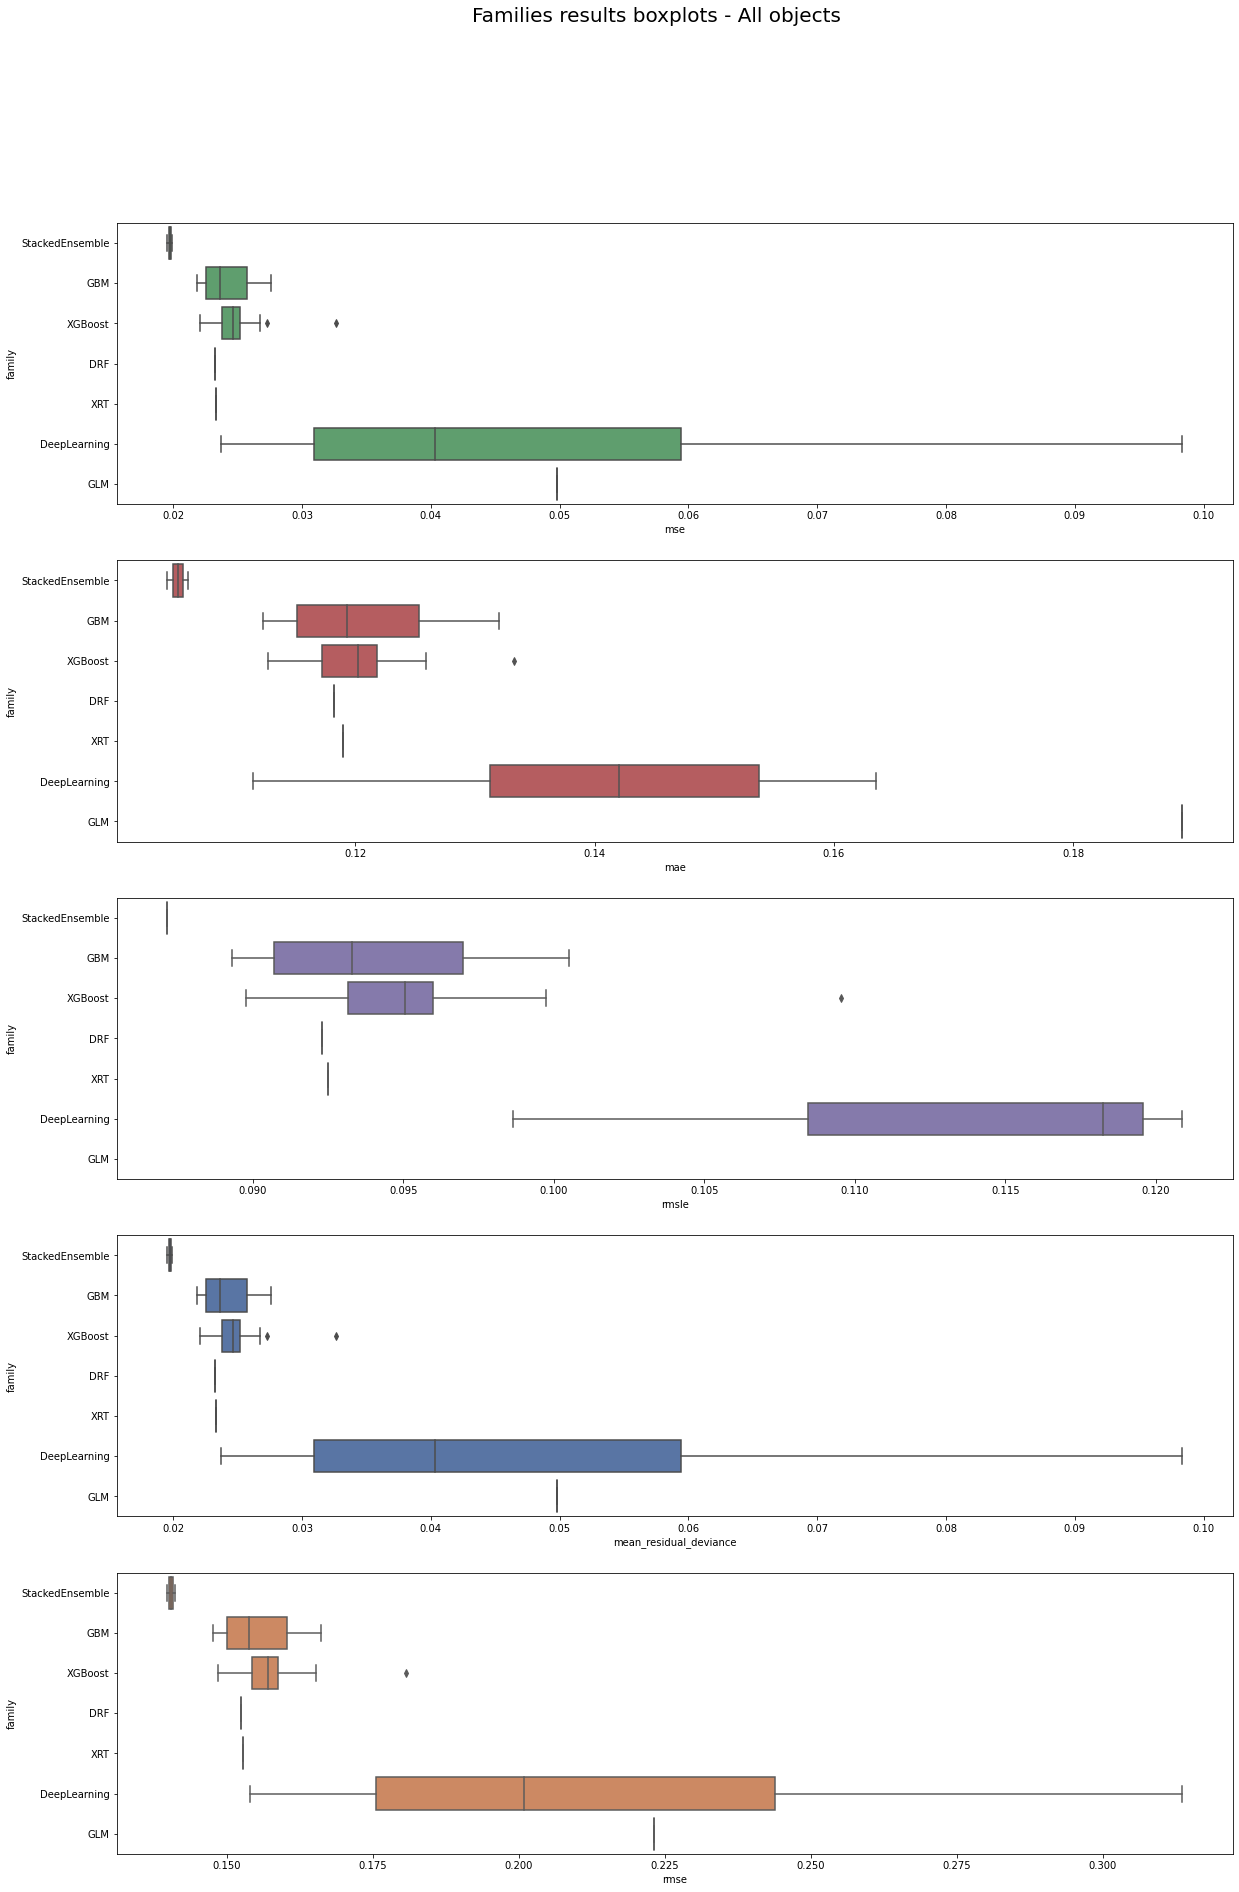

In [51]:
size = (20, 30)
title = "Families results boxplots - All objects"
fig, axs = plt.subplots(nrows=len(df_all.columns)-2, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(df_all.columns[1:-1]):
    sns.boxplot(
        x=col,
        y="family",
        data=df_all,
        showfliers = True,
        color=custom_palette[i],
        ax=axs[i-2]
    )
plt.savefig('../../data/boxplot_families_all.pdf') 

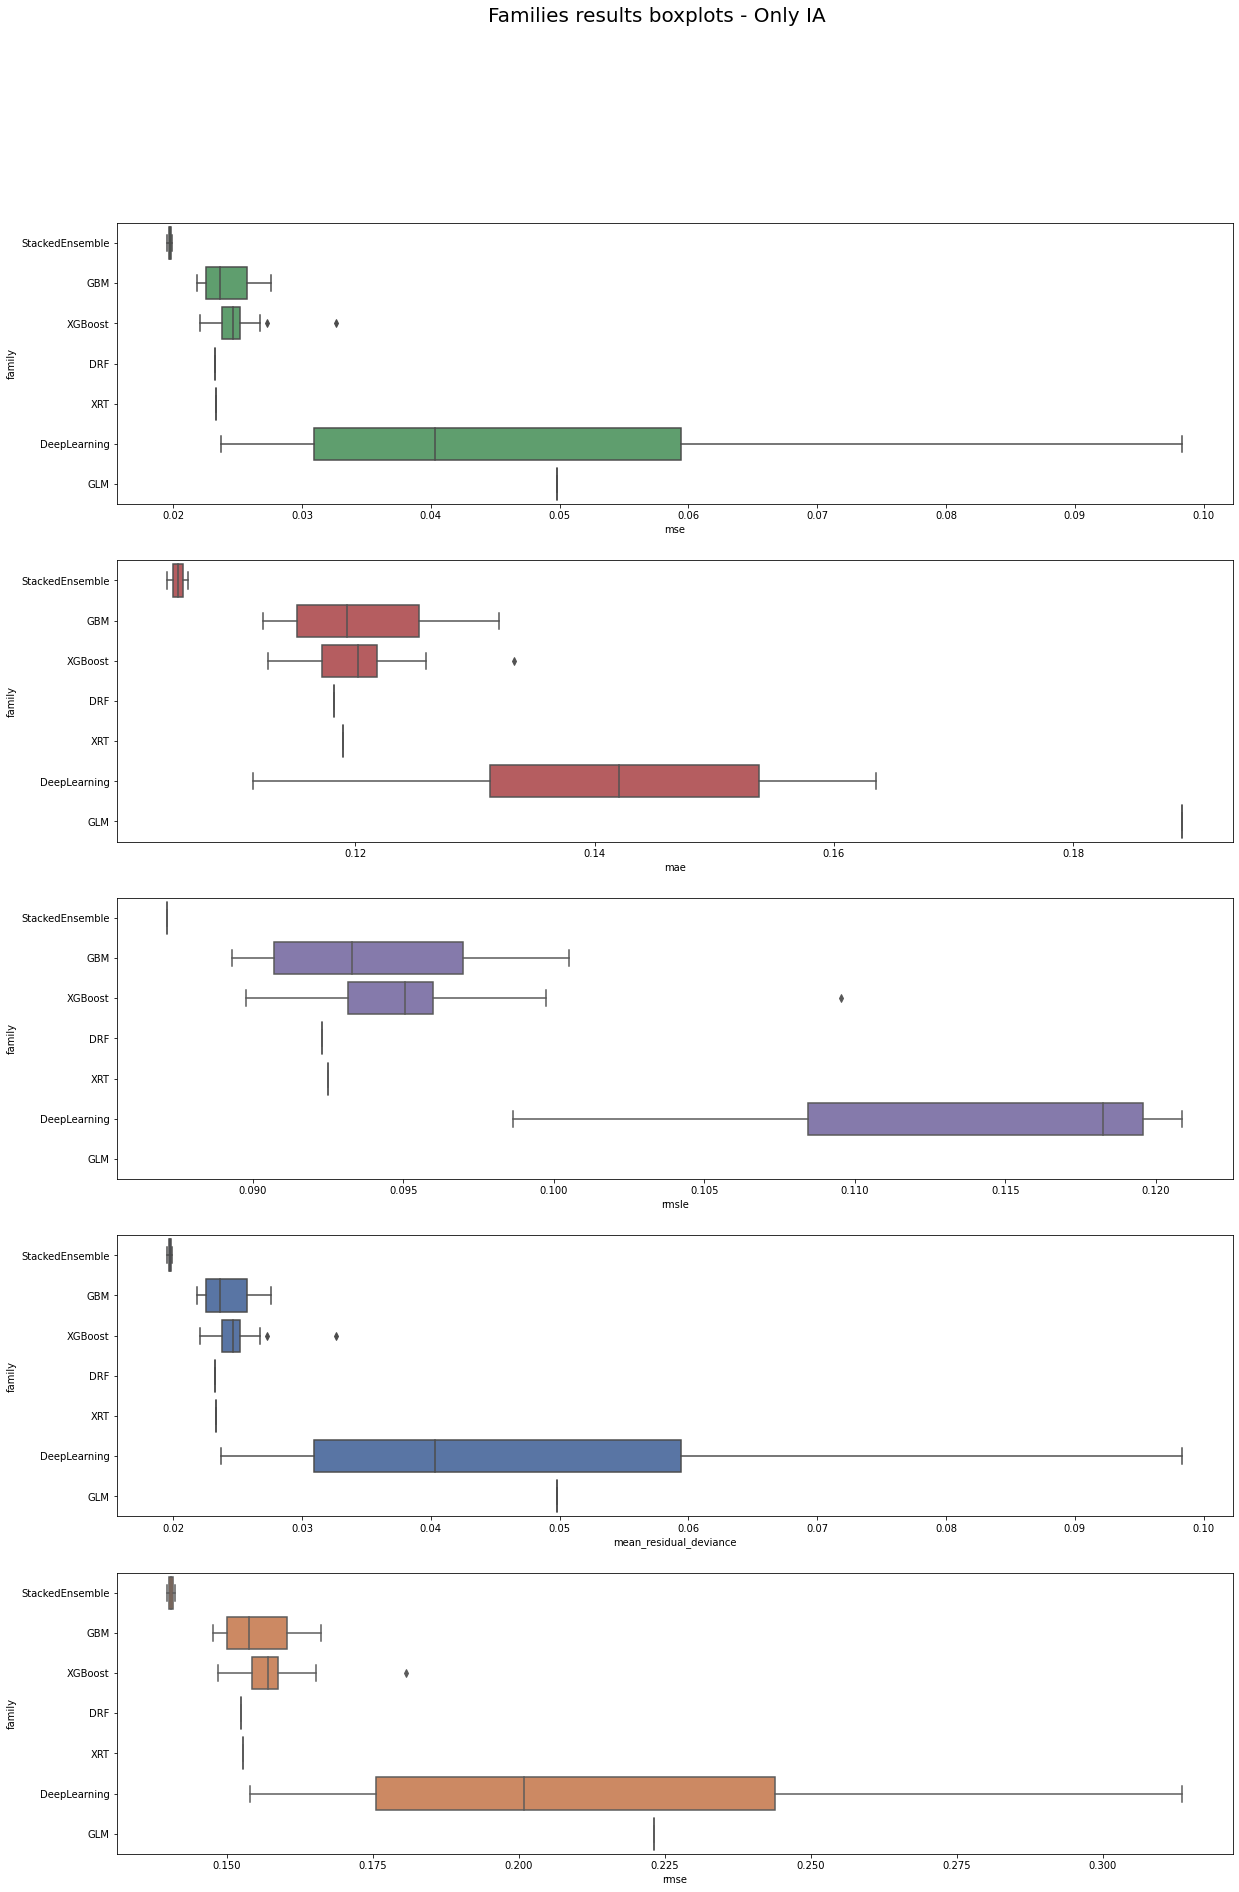

In [52]:
size = (20, 30)
title = "Families results boxplots - Only IA"
fig, axs = plt.subplots(nrows=len(df_IA.columns)-2, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(df_IA.columns[1:-1]):
    sns.boxplot(
        x=col,
        y="family",
        data=df_all,
        showfliers = True,
        color=custom_palette[i],
        ax=axs[i-2]
    )
plt.savefig('../../data/boxplot_families_IA.pdf') 